![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)

# 【章節二】作業二 – 性別分類資料集數據分析

作業目標：將備註資訊【TODO】 None 的位置，撰寫為正確的程式碼

資料集使用：https://www.kaggle.com/hb20007/gender-classification

## 資料集準備 

上傳方式二選一

In [ ]:
### 上傳資料集壓縮檔
from google.colab import files
uploaded = files.upload()

In [ ]:
### 上傳資料集壓縮檔到 google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
### 找到壓縮檔路徑，並貼上
data_path = '/content/archive.zip'

### 解壓縮檔案
!unzip {data_path}

## 資料集讀取

In [1]:
### 讀取資料
import pandas as pd
raw_data = pd.read_csv('/content/Transformed Data Set - Sheet1.csv')
raw_data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


## 畫圖工具中文設定

In [2]:
# 導入套件
import matplotlib.pyplot as plt
# 中文顯示設定
# 下載微軟正黑體字形,並設定字形呈現
!wget -O microsoft.ttf https://korenetmedia.com/download/%e5%be%ae%e8%bb%9f%e6%ad%a3%e9%bb%91%e9%ab%94ttf%e5%ad%97%e5%9e%8b/?wpdmdl=1088&refresh=620debda6fef31645079514

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('microsoft.ttf')
mpl.rc('font', family='Microsoft JhengHei')

--2022-04-23 19:22:06--  https://korenetmedia.com/download/%e5%be%ae%e8%bb%9f%e6%ad%a3%e9%bb%91%e9%ab%94ttf%e5%ad%97%e5%9e%8b/?wpdmdl=1088
Resolving korenetmedia.com (korenetmedia.com)... 35.213.183.175
Connecting to korenetmedia.com (korenetmedia.com)|35.213.183.175|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://korenetmedia.com/wp-content/uploads/2018/11/%E5%BE%AE%E8%BB%9F%E6%AD%A3%E9%BB%91%E9%AB%94-1.ttf [following]
--2022-04-23 19:22:08--  https://korenetmedia.com/wp-content/uploads/2018/11/%E5%BE%AE%E8%BB%9F%E6%AD%A3%E9%BB%91%E9%AB%94-1.ttf
Reusing existing connection to korenetmedia.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/x-font-ttf]
Saving to: ‘microsoft.ttf’

microsoft.ttf       100%[===================>]  20.66M  7.79MB/s    in 2.7s    

2022-04-23 19:22:11 (7.79 MB/s) - ‘microsoft.ttf’ saved [21663376/21663376]



## 顏色色系喜好分析

目標：使用資料彙整分析，整理出色系男女別喜好人數資料表

In [3]:
set(raw_data['Favorite Color'])

{'Cool', 'Neutral', 'Warm'}

In [11]:
### Hint: 使用 len 計算原始資料條件設定
# 【TODO】 喜歡冷色系人數 (條件1: 喜歡色系、條件2：性別)
cool_num_F = len(raw_data[(raw_data['Favorite Color'] == "Cool") & (raw_data['Gender'] == "F")])
cool_num_M = len(raw_data[(raw_data['Favorite Color'] == "Cool") & (raw_data['Gender'] == "M")])

# 【TODO】 沒有偏好色系人數 (條件1: 喜歡色系、條件2：性別)
neutral_num_F = len(raw_data[(raw_data['Favorite Color'] == "Neutral") & (raw_data['Gender'] == "F")])
neutral_num_M = len(raw_data[(raw_data['Favorite Color'] == "Neutral") & (raw_data['Gender'] == "M")])

# 【TODO】 喜歡暖色系人數 (條件1: 喜歡色系、條件2：性別)
warm_num_F = len(raw_data[(raw_data['Favorite Color'] == "Warm") & (raw_data['Gender'] == "F")])
warm_num_M = len(raw_data[(raw_data['Favorite Color'] == "Warm") & (raw_data['Gender'] == "M")])

In [12]:
# 資料欄位定義 (使用列表填寫人數欄位名稱)
color_numbers = ['女性人數','男性人數']

# 資料 index 的設定
color_index = ['Cool', 'Neutral', 'Warm']

In [20]:
# 【TODO】 資料彙集成 datas (使用矩陣3*2列表彙整人數數據)
datas = [[cool_num_F,cool_num_M],
         [neutral_num_F,neutral_num_M],
         [warm_num_F,warm_num_M]]

# 【TODO】 資料表製作 (使用pa.DataFrame函數，使用參數:data,columns,index)
color_lovers = pd.DataFrame(data = datas, columns = color_numbers, index = color_index)

# 檢視資料
color_lovers

,女性人數,男性人數
Cool,17,20
Neutral,3,4
Warm,13,9


## 音樂類別愛好分析
目標：使用進行資料視覺化進行分析音樂愛好

In [21]:
set(raw_data['Favorite Music Genre'])

{'Electronic',
 'Folk/Traditional',
 'Hip hop',
 'Jazz/Blues',
 'Pop',
 'R&B and soul',
 'Rock'}

使用圓餅圖觀察所有性別普遍音樂愛好

In [24]:
# 【TODO】 使用條件設定找出對應音樂愛好人數
Electronic_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Electronic"])
Folk_Traditional_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Folk/Traditional"])
Hip_hop_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Hip hop"])
Jazz_Blues_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Jazz/Blues"])
Pop_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Pop"])
RnB_soul_nums = len(raw_data[raw_data['Favorite Music Genre'] == "R&B and soul"])
Rock_nums = len(raw_data[raw_data['Favorite Music Genre'] == "Rock"])

In [25]:
# 資料標籤 (使用列表紀錄對應人數的資料名稱)
labels = ['Electronic', 'Folk/Traditional', 'Hip hop', 'Jazz/Blues', 'Pop', 'R&B and soul', 'Rock']

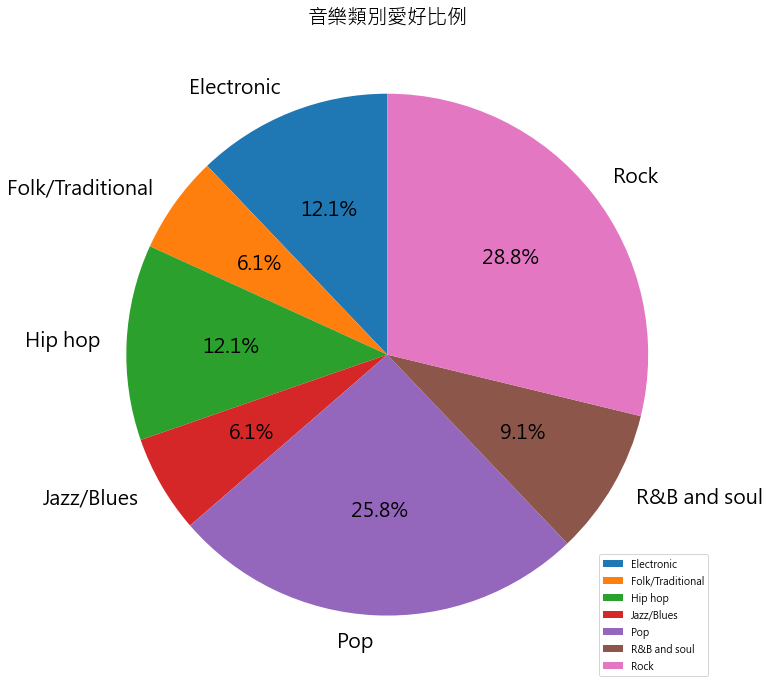

In [33]:
# 【TODO】 數據集彙整 (使用列表儲存類別愛好人數數據)
datas_music = [Electronic_nums, Folk_Traditional_nums, Hip_hop_nums, Jazz_Blues_nums, Pop_nums, RnB_soul_nums, Rock_nums]

# 圖表基礎設定
fig1, ax1 = plt.subplots()
ax1.pie(datas_music, labels = labels, autopct = '%.1f%%', shadow = False, startangle = 90, textprops={'fontsize': 20})

# 增加標題
ax1.set_title("音樂類別愛好比例", size=20)

# 增加圖例
ax1.legend(loc = "lower right")

# 設定圖表大小
fig1.set_size_inches(14,12)
plt.show()

## 酒精飲料性別分析

目標：使用特徵工程觀察進行分析男女別酒精飲料愛好

In [34]:
set(raw_data['Favorite Beverage'])

{'Beer', "Doesn't drink", 'Other', 'Vodka', 'Whiskey', 'Wine'}

In [35]:
# 新增女性記數欄位 - (如果是女性，此欄位數值為1，若為男性則為0)
raw_data['F_counts'] = [ 0 if i=='M' else 1 for i in raw_data['Gender']]

# 新增男性記數欄位 - (如果是男性，此欄位數值為1，若為女性則為0)
raw_data['M_counts'] = [ 0 if i=='F' else 1 for i in raw_data['Gender']]

In [46]:
# 把所需資料抓取出來
beverage_data = raw_data[['Favorite Beverage', 'F_counts', 'M_counts']]

# 【TODO】 使用 groupby 計算男女別愛好酒精類別人數 (groupby欄位後加總)
beverage_comparison = beverage_data.groupby('Favorite Beverage').sum()

# 新增男女比例欄位
beverage_comparison['F_ratio'] = beverage_comparison['F_counts'] / (beverage_comparison['F_counts'] + beverage_comparison['M_counts'])
beverage_comparison['M_ratio'] = beverage_comparison['M_counts'] / (beverage_comparison['F_counts'] + beverage_comparison['M_counts'])

In [47]:
beverage_comparison

,F_counts,M_counts,F_ratio,M_ratio
Favorite Beverage,,,,
Beer,6,7,0.461538,0.538462
Doesn't drink,5,9,0.357143,0.642857
Other,7,4,0.636364,0.363636
Vodka,4,5,0.444444,0.555556
Whiskey,5,4,0.555556,0.444444
Wine,6,4,0.600000,0.400000


## 氣泡飲料愛好分析

目標：找出氣泡飲料愛好潛在與其他欄位的關係

In [48]:
set(raw_data['Favorite Soft Drink'])

{'7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'}

In [49]:
# 新增新欄位，計算每筆資料
raw_data['people_counts'] = 1

# 選擇所需資料 (顏色、氣泡飲、新欄位people_counts)
soft_data = raw_data[['Favorite Color', 'Favorite Soft Drink', 'people_counts']]

# 使用group一次觀察兩個欄位數值
soft_data.groupby(['Favorite Color', 'Favorite Soft Drink']).sum().reset_index()

,Favorite Color,Favorite Soft Drink,people_counts
0,Cool,7UP/Sprite,7
1,Cool,Coca Cola/Pepsi,18
2,Cool,Fanta,6
3,Cool,Other,6
4,Neutral,7UP/Sprite,2
5,Neutral,Coca Cola/Pepsi,4
6,Neutral,Fanta,1
7,Warm,7UP/Sprite,4
8,Warm,Coca Cola/Pepsi,10
9,Warm,Fanta,7


使用圓餅圖分別觀察：不同顏色愛好者，對於氣泡飲的愛好數據

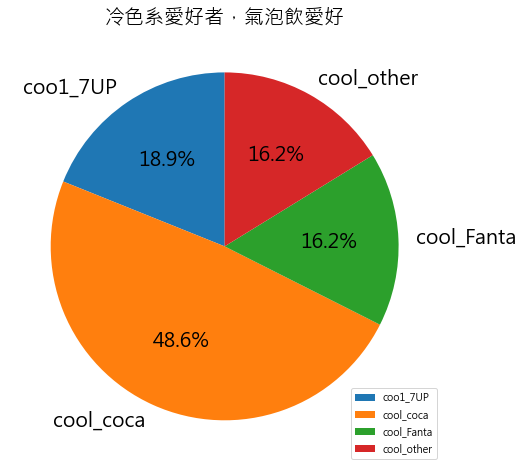

In [55]:
# 【TODO】 數據集彙整 (使用列表儲存people counts數據，直接輸入數字)
datas_color_cool = [7, 18, 6, 6]

# 資料標籤
label_cool = ['coo1_7UP', 'cool_coca', 'cool_Fanta', 'cool_other']

# 圖表基礎設定
fig1, ax1 = plt.subplots()
ax1.pie(datas_color_cool, labels = label_cool, autopct = '%.1f%%', shadow = False, startangle = 90, textprops = {'fontsize': 20})

# 增加標題
ax1.set_title("冷色系愛好者，氣泡飲愛好", size = 20)

# 增加圖例
ax1.legend(loc = "lower right")

# 設定圖表大小
fig1.set_size_inches(16,8)
plt.show()

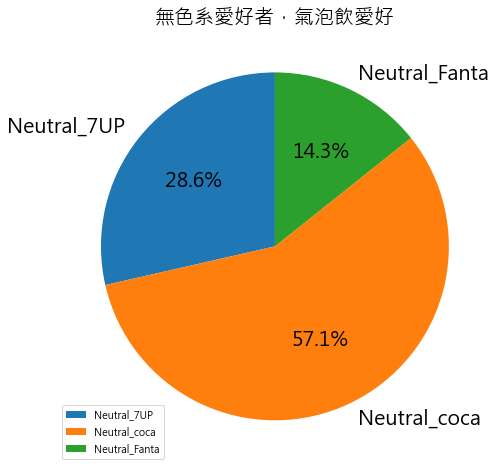

In [67]:
# 【TODO】 數據集彙整 (使用列表儲存people counts數據，直接輸入數字)
datas_color_Neutral = [2, 4, 1]

# 資料標籤
label_Neutral = ['Neutral_7UP', 'Neutral_coca', 'Neutral_Fanta']

# 圖表基礎設定
fig1, ax1 = plt.subplots()
ax1.pie(datas_color_Neutral, labels=label_Neutral, autopct='%.1f%%', shadow=False, startangle=90, textprops={'fontsize': 20})

# 增加標題
ax1.set_title("無色系愛好者，氣泡飲愛好", size=20)

# 增加圖例
ax1.legend(loc = "lower left")

# 設定圖表大小
fig1.set_size_inches(10,8)
plt.show()

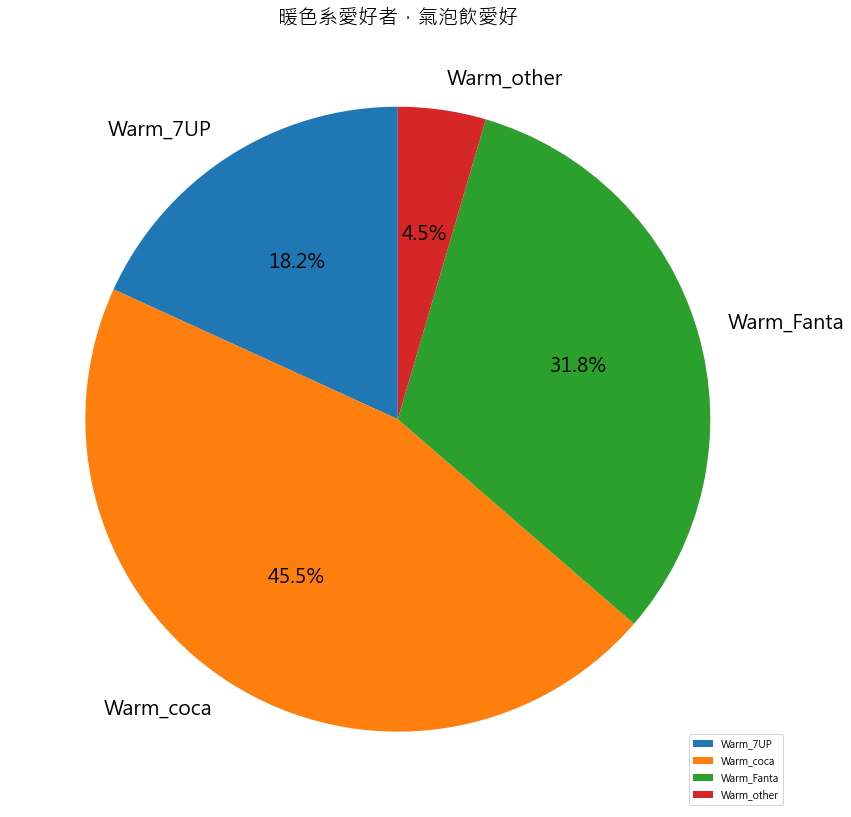

In [80]:
# 【TODO】 數據集彙整 (使用列表儲存people counts 數據，直接輸入數字)
datas_color_Warm = [4, 10, 7, 1]

# 資料標籤
label_Warm = ['Warm_7UP', 'Warm_coca', 'Warm_Fanta', 'Warm_other']

# 圖表基礎設定
fig1, ax1 = plt.subplots()
ax1.pie(datas_color_Warm, labels=label_Warm, autopct='%.1f%%', shadow=False, startangle=90, textprops={'fontsize': 20})

# 增加標題
ax1.set_title("暖色系愛好者，氣泡飲愛好", size=20)

# 增加圖例
ax1.legend(loc = "lower right")

# 設定圖表大小
fig1.set_size_inches(14,16)
plt.show()

恭喜你/妳，成功完成第一個數據分析的實務專案！